In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras import backend as k

# for resizing images
from scipy.misc import imresize

Using TensorFlow backend.


In [2]:
def reshape(x):
    """Reshape images to 14*14"""
    img = imresize(x.reshape(28,28), (14, 14))
    return img

# create 14*14 low resolution train and test images
XX_train = np.array([*map(reshape, X_train.astype(float))])
XX_test = np.array([*map(reshape, X_test.astype(float))])

/home/varunkn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
# scale images to range between 0 and 1
#14*14 train images
XX_train = XX_train/255
#28*28 train label images
X_train = X_train/255

#14*14 test images
XX_test = XX_test/255
#28*28 test label images
X_test = X_test/255

In [ ]:
batch_size = 128
epochs = 40
input_shape = (14,14,1)

In [4]:
def make_autoencoder(input_shape):
    
    generator = Sequential()
    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    generator.add(MaxPooling2D(pool_size=(2, 2)))
    
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    
    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    
    generator.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    return generator


autoencoder = make_autoencoder(input_shape)
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(lr=0.0002, beta_1=0.5))

autoencoder.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
up_s

In [5]:
autoencoder_train = autoencoder.fit(XX_train.reshape(-1,14,14,1), X_train.reshape(-1,28,28,1), batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_split = 0.2)


Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 801s 17ms/step - loss: 0.0333 - val_loss: 0.0345
Epoch 2/40
48000/48000 [==============================] - 767s 16ms/step - loss: 0.0327 - val_loss: 0.0233
Epoch 3/40
48000/48000 [==============================] - 763s 16ms/step - loss: 0.0333 - val_loss: 0.0289
Epoch 4/40
48000/48000 [==============================] - 779s 16ms/step - loss: 0.0326 - val_loss: 0.0438
Epoch 5/40
48000/48000 [==============================] - 787s 16ms/step - loss: 0.0318 - val_loss: 0.0250
Epoch 6/40
48000/48000 [==============================] - 786s 16ms/step - loss: 0.0313 - val_loss: 0.0263
Epoch 7/40
48000/48000 [==============================] - 785s 16ms/step - loss: 0.0312 - val_loss: 0.0368
Epoch 8/40
48000/48000 [==============================] - 792s 16ms/step - loss: 0.0301 - val_loss: 0.0268
Epoch 9/40
48000/48000 [======================

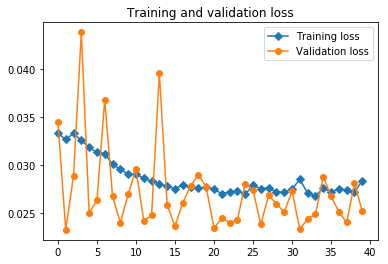

Input


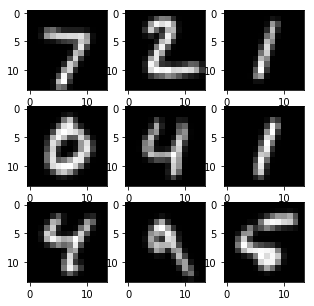

GENERATED


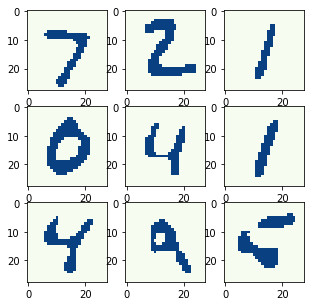

In [7]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs_ = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs_, loss, label='Training loss', marker = 'D')
plt.plot(epochs_, val_loss, label='Validation loss', marker = 'o')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print('Input')
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(np.squeeze(XX_test.reshape(-1,14,14)[i]), cmap='gray')
plt.show()

# Test set results
print('GENERATED')
plt.figure(figsize=(5,5))
for i in range(9):
    pred = autoencoder.predict(XX_test.reshape(-1,14,14,1)[i:i+1], verbose=0)
    plt.subplot(331 + i)
    plt.imshow(pred[0].reshape(28,28), cmap='GnBu')
plt.show()